In [5]:
import torch
import os
import numpy as np
from sklearn import manifold
import random
import matplotlib.pyplot as plt
from sklearn.metrics.cluster import pair_confusion_matrix

path = "/home/linhuadong/DNFNet/jobs/prw_iou_bn/saved_file"
features = torch.load(os.path.join(path, "features.pth"))
person_ids = torch.load(os.path.join(path, "person_ids.pth"))
pseudo_labels = torch.load(os.path.join(path, "pseudo_labels.pth"))
pseudo_labels = torch.tensor(pseudo_labels[0])

num_person_ids = len(set(person_ids.numpy()))
all_instance = len(person_ids)
unlabeled_instance = len(torch.nonzero(person_ids == torch.tensor(-1)))
labelded_instance = all_instance - unlabeled_instance


def get_selected_idx(num_person_ids, person_ids, pseudo_labels):
    # select_person_ids = []
    # select_length = []
    # select_idx = []
    # for idx in range(num_person_ids):
    #     length = len(torch.nonzero(person_ids == torch.tensor(idx)))
    #     if 80 < length and length < 120:
    #         select_idx += torch.nonzero(person_ids == torch.tensor(idx))
    #         select_person_ids.append(idx)
    #         select_length.append(length)
    #     # if len(select_person_ids) == 10:
    #     #     break
    # print(len(select_person_ids))
    # return select_idx

    idxs = [266, 263, 203, 262, 66, 162, 197, 87, 47]   # 72
    select_idx = []
    for idx in idxs:
        select_idx += torch.nonzero(person_ids == torch.tensor(idx))
    return select_idx

select_idx = get_selected_idx(num_person_ids, person_ids, pseudo_labels)
select_features = features[select_idx]
select_person_ids = person_ids[select_idx]
select_pseudo_labels = pseudo_labels[select_idx]

X = select_features

def id_mapping(ids):
    # 将person id映射到从0开始编码
    unique_ids = set(np.array(ids))
    mapping = {}
    for i, value in enumerate(list(unique_ids)):
        mapping[value] = i
    Y = np.array(ids).copy()
    for i in range(Y.shape[0]):
        Y[i] = mapping[Y[i]]
    return Y

Y = id_mapping(select_person_ids)
select_pseudo_labels = id_mapping(select_pseudo_labels)

select_person_ids = select_person_ids.tolist()
select_pseudo_labels = select_pseudo_labels.tolist()

/home/linhuadong/miniconda3/envs/mmdet/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:827: FutureWarning: 'square_distances' has been introduced in 0.24 to help phase out legacy squaring behavior. The 'legacy' setting will be removed in 1.1 (renaming of 0.26), and the default setting will be changed to True. In 1.3, 'square_distances' will be removed altogether, and distances will be squared by default. Set 'square_distances'=True to silence this warning.
  FutureWarning,
/home/linhuadong/miniconda3/envs/mmdet/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,


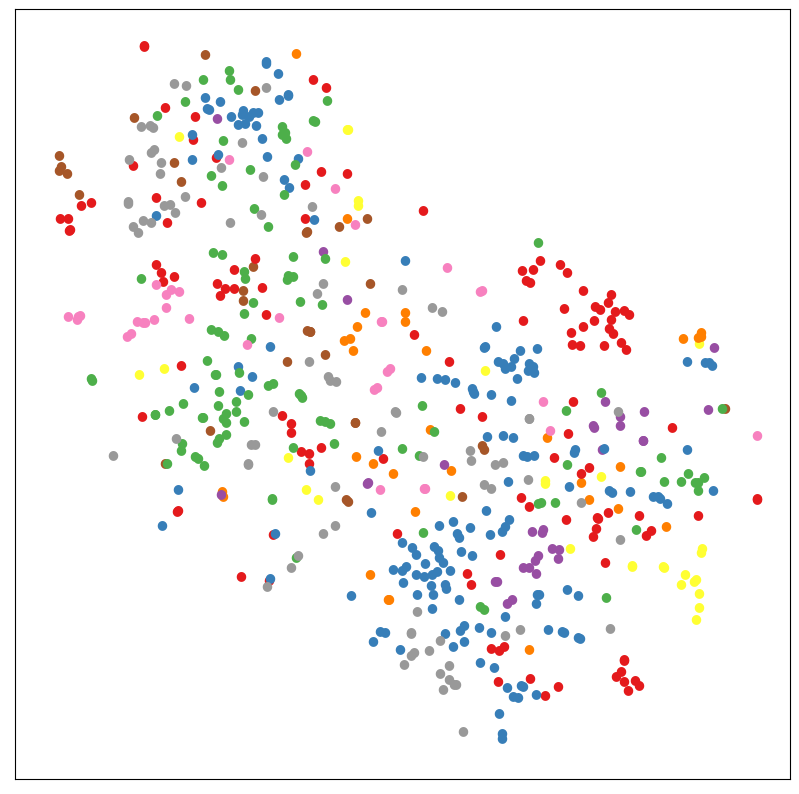

In [6]:
def visualize(X, y):
    '嵌入空间可视化'''
    x_min, x_max = X.min(0), X.max(0)
    X_norm = 0.05 + (X - x_min) / (x_max - x_min) * (0.95 - 0.05)  # 归一化
    plt.figure(figsize=(10, 10))
    ax = plt.gca()
    for i in range(X_norm.shape[0]):
        # plt.text(X_norm[i, 0], X_norm[i, 1], str(select_person_ids[i]), color=plt.cm.Set1(y[i]), fontdict={'weight': 'bold', 'size': 9})
        plt.text(X_norm[i, 0], X_norm[i, 1], '●', color=plt.cm.Set1(y[i]), fontdict={'weight': 'bold', 'size': 9})
    plt.xticks([])
    plt.yticks([])
    # plt.savefig("./tSNE.jpg", bbox_inches='tight', pad_inches=0)
    # plt.savefig('./FINCH_context.eps', dpi=100, format='eps', bbox_inches='tight', pad_inches=0)
    plt.show()
X_tsne = manifold.TSNE(n_components=2, perplexity=30, learning_rate=500, init='pca', random_state=501, n_iter=600, verbose=0, metric='cosine').fit_transform(X)
visualize(X_tsne, Y)